<a href="https://colab.research.google.com/github/gourab337/playhouse/blob/master/Covid_19_DGR_and_Growth_Rate(Graph).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import requests
import ssl


 HIGH RISK COUNTRIES (DGR > 2%) : 

Sl No.      COUNTRY                                 DEATH GROWING RATE 


Enter a Country to know it's DEATH GROWING RATE (Enter 0 to exit) : 
india


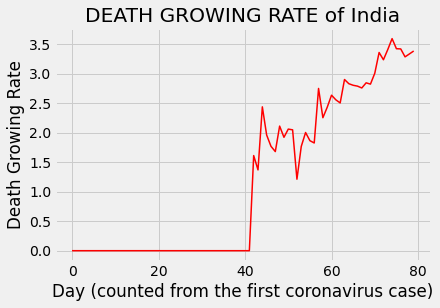


Do you want to see details for the above graph? (Press 1 for Yes (or) Press 0 for No):
0
Enter a Country to know it's DEATH GROWING RATE (Enter 0 to exit) : 
0

EXIT Successful. 
Thank You. 



In [38]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

style.use('fivethirtyeight')

url = "https://api.covid19api.com/total/dayone/country/"
url2 = "https://api.covid19api.com/countries"

print("\n HIGH RISK COUNTRIES (DGR > 2%) : \n")
print("Sl No.      " + "COUNTRY".ljust(40," ") + "DEATH GROWING RATE \n")

hrc = set([])

response2 = requests.request("GET", url2)
data2 = response2.json()

k=0
for i in data2 :
    #break
    try :
        url = "https://api.covid19api.com/total/dayone/country/"
        url = url + i["Slug"]

        response = requests.request("GET", url)
        data = response.json()

        for j in data :
            c=float(j["Confirmed"])
            d=float(j["Deaths"])
        
            if c==0 :
                dgr=0            
            else :
                dgr=(d/c)*100

            if dgr>=2 :
                hrc.add(i["Country"])
                k=k+1
                print((str(k) + ". ").rjust(6," ") + "      " + i["Country"].ljust(40," ") + str(dgr))
                break
    except :
        print(("------------The country " + i["Country"] + " had some data problem ").ljust(80,"-") + " Check your connection and try again.")        

print("")
#print(hrc)
#print("")

#print(" " + " "+ " "+ " "+" "+ " ")

while True :
    a = input("Enter a Country to know it's DEATH GROWING RATE (Enter 0 to exit) : \n")
    if a == '0' :
        break
    else :
        try :
            a = a.lower()            
            url = "https://api.covid19api.com/total/dayone/country/"

            if (a == 'usa') or (a == 'us') or (a == 'united states of america') or (a == 'the united states of america') :
                a = "united states"
            elif (a == 'uk') or (a == 'england') or (a == 'great britain'):
                a = "united kingdom"
            elif a == 'uae':
                a = 'united arab emirates'

            url = url + a.replace(" ","-")

            response = requests.request("GET", url)
            data = response.json()

            i=0
            x=[0]
            y=[0]            
            for j in data :
                i=i+1
                c=float(j["Confirmed"])
                d=float(j["Deaths"])
        
                if c==0 :
                    dgr=0            
                else :
                    dgr=(d/c)*100

                x.append(i)
                y.append(dgr)

            plt.plot(x,y,c='r',linewidth=1.5)
            plt.xlabel('Day (counted from the first coronavirus case)') 
            plt.ylabel('Death Growing Rate') 
            plt.title('DEATH GROWING RATE of ' + a.title()) 
            plt.show()
            print("")

            resp=int(input("Do you want to see details for the above graph? (Press 1 for Yes (or) Press 0 for No):\n"))
            if resp == 1:
              a = a.lower()            
              url = "https://api.covid19api.com/total/dayone/country/"

              if (a == 'usa') or (a == 'us') or (a == 'united states of america') or (a == 'the united states of america') :
                  a = "united states"
              elif (a == 'uk') or (a == 'england') or (a == 'great britain'):
                  a = "united kingdom"
              elif a == 'uae':
                   a = 'united arab emirates'

              url = url + a.replace(" ","-")

              response = requests.request("GET", url)
              data = response.json()
              i=0
              x=[0]
              y=[0]            
              for j in data :
                i=i+1
                c=float(j["Confirmed"])
                d=float(j["Deaths"])
        
                if c==0 :
                    dgr=0            
                else :
                    dgr=(d/c)*100

                x.append(i)
                y.append(dgr)
                
                if i==1 :
                    print("      DAY     DATE          CONFIRMED      DEATHS       DEATH GROWING RATE (in %)")

                print("    " + (str(i) + ".    ").rjust(10," ") + str(j["Date"][0:10]) + "    " + str(int(c)).rjust(10," ") + "    " + str(int(d)).rjust(8," ") + "      " ,end="")
                print(f'{dgr:9.4f}')    
                               
            
        except :                
            print("    The country '" + a + "' had some data problem \n---" + " Check your connection and try again (or) Check the country name again.---\n")

print("\nEXIT Successful. \nThank You. \n")
